# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       
        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | nizhnyaya poyma
Processing Record 3 of Set 1 | lake havasu city
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | guarapari
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | karratha
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 13 of Set 1 | conduaga
Processing Record 14 of Set 1 | kargil
Processing Record 15 of Set 1 | holualoa
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | lethem
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 20 of Set 1 | papatowa

In [5]:
city_url = f"https://api.openweathermap.org/data/2.5/weather?q=london&appid=e71d2cfd383ca19a256c78dc06fa373a"

city_weather = requests.get(city_url).json()
print(city_weather)
print(weather_api_key)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.38, 'feels_like': 290.61, 'temp_min': 288.78, 'temp_max': 291.48, 'pressure': 1009, 'humidity': 94, 'sea_level': 1009, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 4.94, 'deg': 229, 'gust': 10.48}, 'clouds': {'all': 100}, 'dt': 1696290001, 'sys': {'type': 2, 'id': 2006068, 'country': 'GB', 'sunrise': 1696313014, 'sunset': 1696354534}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}
e71d2cfd383ca19a256c78dc06fa373a


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,296.18,64,75,4.12,CK,1696290181
1,nizhnyaya poyma,56.1622,97.1933,275.14,97,100,3.06,RU,1696290182
2,lake havasu city,34.4839,-114.3224,301.61,24,7,2.57,US,1696290182
3,waitangi,-43.9535,-176.5597,283.05,91,97,5.81,NZ,1696290182
4,guarapari,-20.6667,-40.4975,296.98,96,94,0.73,BR,1696290182


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,296.18,64,75,4.12,CK,1696290181
1,nizhnyaya poyma,56.1622,97.1933,275.14,97,100,3.06,RU,1696290182
2,lake havasu city,34.4839,-114.3224,301.61,24,7,2.57,US,1696290182
3,waitangi,-43.9535,-176.5597,283.05,91,97,5.81,NZ,1696290182
4,guarapari,-20.6667,-40.4975,296.98,96,94,0.73,BR,1696290182


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

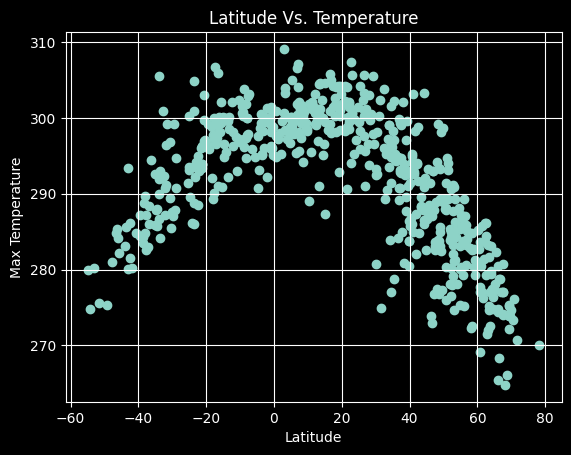

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

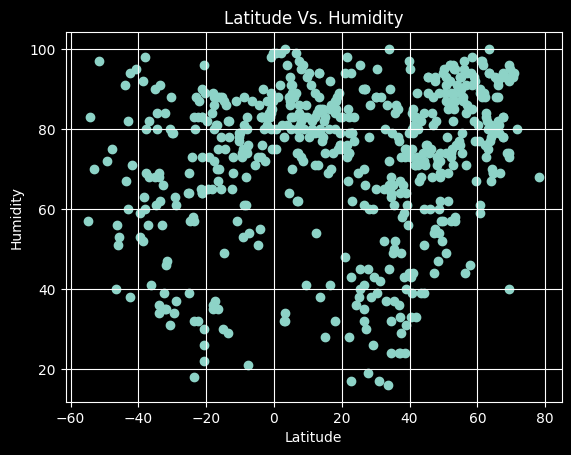

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

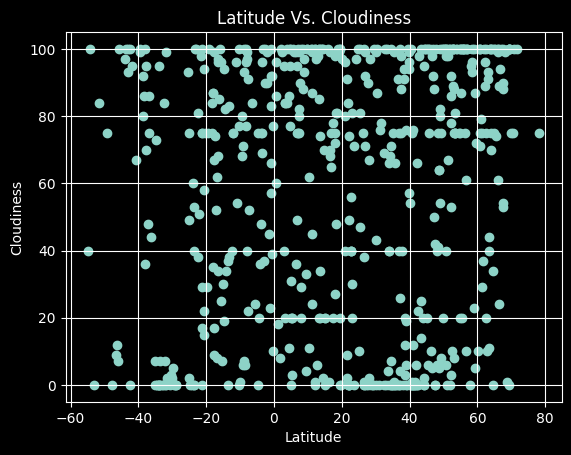

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

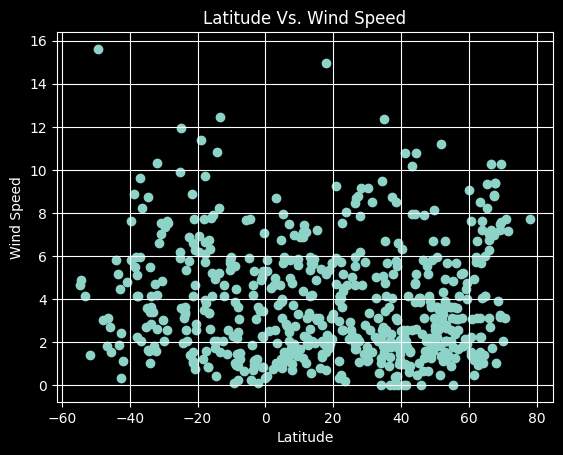

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
import textwrap

def plot_linear_regression(x_value, y_values, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    print(f"The r-value is: {r_value}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, text_coordinates,
                fontsize=15,
                color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nizhnyaya poyma,56.1622,97.1933,275.14,97,100,3.06,RU,1696290182
2,lake havasu city,34.4839,-114.3224,301.61,24,7,2.57,US,1696290182
5,ribeira grande,38.5167,-28.7000,292.47,75,3,3.13,PT,1696290183
6,yellowknife,62.4560,-114.3525,284.49,83,75,3.09,CA,1696290049
8,ilulissat,69.2167,-51.1000,272.16,40,0,7.20,GL,1696290183


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,296.18,64,75,4.12,CK,1696290181
3,waitangi,-43.9535,-176.5597,283.05,91,97,5.81,NZ,1696290182
4,guarapari,-20.6667,-40.4975,296.98,96,94,0.73,BR,1696290182
7,karratha,-20.7377,116.8463,299.78,30,58,6.28,AU,1696290183
13,edinburgh of the seven seas,-37.0676,-12.3116,282.98,56,48,9.62,SH,1696290153


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8293436326896481


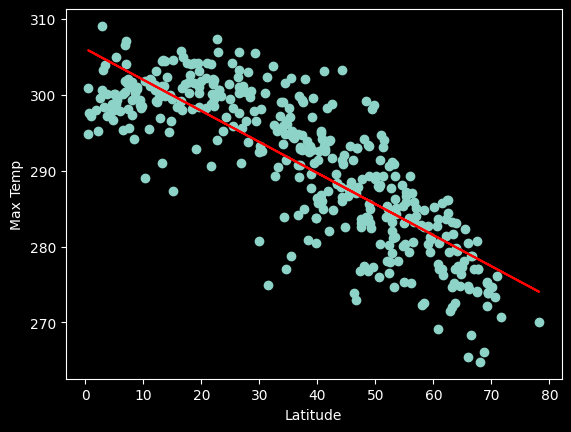

In [40]:
# Linear regression on Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Max Temp',(5,-20))

The r-value is: 0.7613522745877106


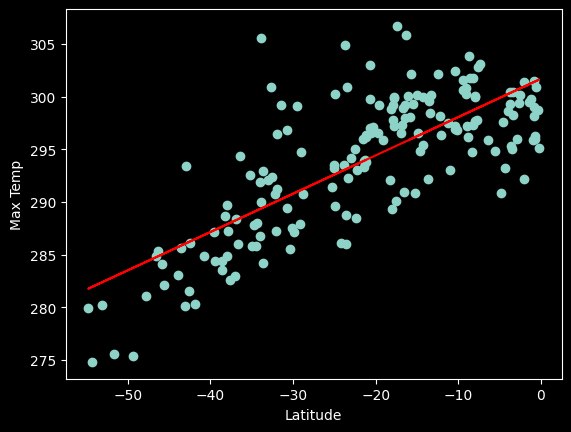

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Max Temp',(5,-20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08463822408874434


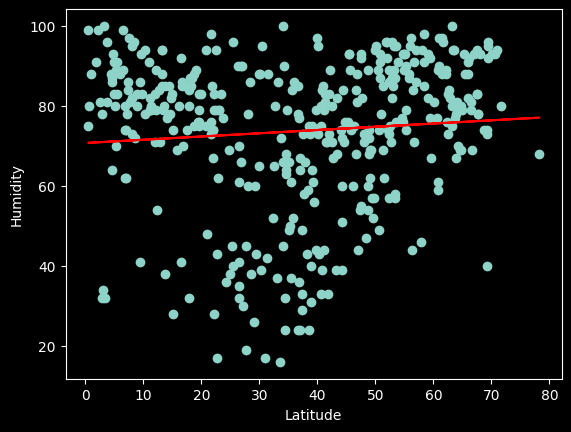

In [42]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Humidity',(5,-20))

The r-value is: 0.21386976964570592


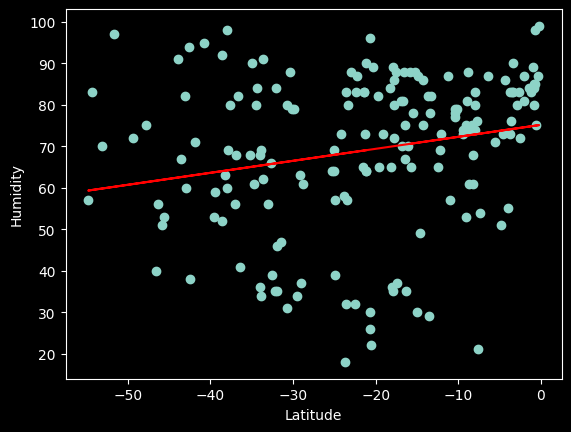

In [43]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Humidity',(5,-20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0948453868442655


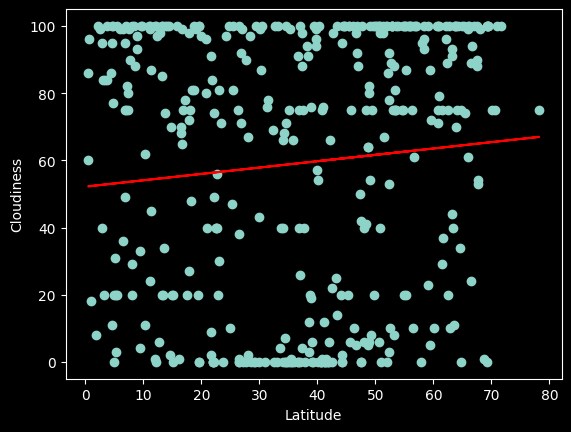

In [46]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Cloudiness',(5,-20))

The r-value is: 0.15041899998723154


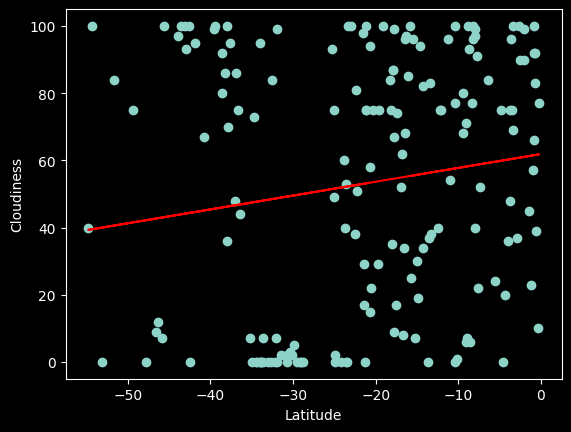

In [47]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Cloudiness',(5,-20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08401339405987415


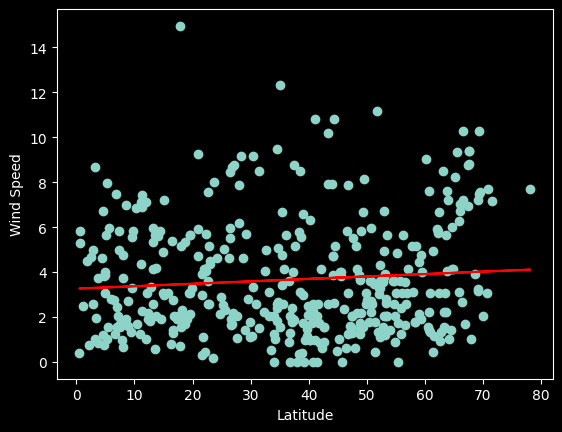

In [49]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Wind Speed',(5,-20))

The r-value is: -0.17232342864757255


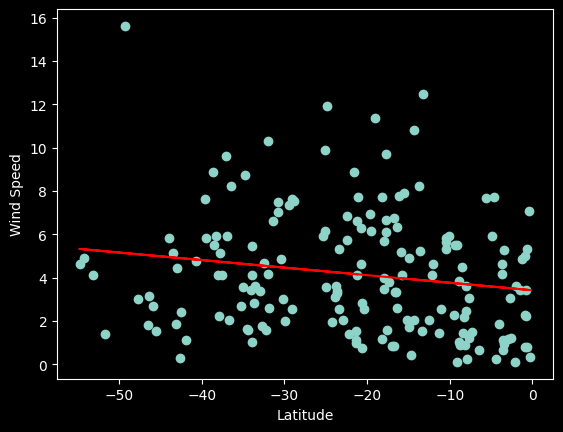

In [50]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Wind Speed',(5,-20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE